# Evaluation Results

##### Imports

In [1]:
%matplotlib inline

import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import matplotlib
import seaborn as sns
from scipy import stats

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'legend.fontsize': 3,
    'text.usetex': True,
    "pgf.rcfonts": False 
})

sys.path.append(os.path.dirname((os.path.abspath(""))))

from src.evaluation.visualization import line_plot, bar_chart, box_plot, set_size
from src.envs.obstacle_avoidance import ObstacleAvoidance, generate_obstacles

pd.options.display.max_columns = None
pd.options.display.max_rows = None

def export_legend(legend, filename="legend.pgf", expand=[-5,-5,5,5]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, format='pgf', bbox_inches=bbox)
    
sns.set_theme()
sns.set_style("whitegrid")

colors = [
    'dimgray',
    'lightgray',
    'darkgray',
    'darkorange',
    'darkorange'
]

##### Choose the evaluation results to analyze

In [2]:
episode_results_path = '../results/experiment_1/complex_evaluation/step_results.pkl'
step_results_path = '../results/experiment_1/complex_evaluation/episode_results.pkl'

##### Choose the algorithms to plot

In [3]:
algorithms = ['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked']
#algorithms = ['TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked']
#algorithms = ['MPS-TD3', 'PAM']
#algorithms = ['PAM', 'MPS-TD3']
#algorithms = ['MPS-TD3', 'PAM', 'PPO-Random', 'PPO-Masked', 'TD3-Projection']
#algorithms = ['TD3-Random', 'MPS-TD3', 'PAM']
#algorithms = ['PPO-Masking', 'MPS-TD3']
#algorithms = ['PPO', 'MPS-TD3']

all = ['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked', 'TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked', 'MPS-TD3', 'PAM']
all_ = ['TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked', 'PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked', 'MPS-TD3', 'PAM']

##### Import evaluation results

In [4]:
step_results = pd.read_pickle(step_results_path)
step_results['fraction_allowed_actions'] = step_results['fraction_allowed_actions'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)
step_results.head()

,action,reward,step,fraction_allowed_actions,allowed_interval_length,number_intervals,interval_avg,interval_min,interval_max,interval_variance,algorithm,num,seed,obstacles
0,-110.0,1.9760,1,0.635241,139.753006,1,139.753006,139.753006,139.753006,0.0,DQN-Masked,0,0,14
1,82.5,4.7890,2,0.444559,97.803001,1,97.803001,97.803001,97.803001,0.0,DQN-Masked,0,0,14
2,-27.5,4.7742,3,1.000000,220.000000,1,220.000000,220.000000,220.000000,0.0,DQN-Masked,0,0,14
3,27.5,4.6869,4,1.000000,220.000000,1,220.000000,220.000000,220.000000,0.0,DQN-Masked,0,0,14
4,-27.5,4.6766,5,0.640877,140.992996,1,140.992996,140.992996,140.992996,0.0,DQN-Masked,0,0,14


In [5]:
episode_results = pd.read_pickle(episode_results_path)
episode_results.head()

,seed,obstacles,solved,steps,reward,trajectory,fraction_allowed_actions_avg,interval_avg,interval_min,interval_max,interval_variance,obstacle_size,algorithm,num
0,0,14,True,17,116.39000,"[[1.0, 1.0], [1.9397, 0.65798], [2.4014, 1.545...",0.709183,140.627608,133.405317,148.626634,269.439053,1.013428,DQN-Masked,0
1,1,14,True,17,113.02230,"[[1.0, 1.0], [1.9397, 0.65798], [2.4014, 1.545...",0.667266,126.310872,115.114401,137.507343,513.966419,0.928946,DQN-Masked,0
2,2,14,True,18,115.44920,"[[1.0, 1.0], [1.9397, 0.65798], [2.4014, 1.545...",0.746872,151.421524,141.615779,161.227268,537.976612,0.862675,DQN-Masked,0
3,3,14,True,22,112.77516,"[[1.0, 1.0], [1.9397, 0.65798], [2.4014, 1.545...",0.598602,108.890760,101.920638,116.145807,178.357894,0.912922,DQN-Masked,0
4,4,14,True,19,114.99810,"[[1.0, 1.0], [1.9397, 0.65798], [2.4014, 1.545...",0.662623,136.157177,132.936916,139.377437,118.806241,0.995156,DQN-Masked,0


##### Exclude specific training runs, if necessary

In [ ]:
step_results = step_results[~((step_results['num'] == 2) & (step_results['algorithm'] == 'TD3-Projection'))]
step_results = step_results[~((step_results['num'] == 2) & (step_results['algorithm'] == 'PAM'))]
step_results = step_results[~((step_results['num'] == 3) & (step_results['algorithm'] == 'PAM'))]

episode_results = episode_results[~((episode_results['num'] == 2) & (episode_results['algorithm'] == 'TD3-Projection'))]
episode_results = episode_results[~((episode_results['num'] == 2) & (episode_results['algorithm'] == 'PAM'))]
episode_results = episode_results[~((episode_results['num'] == 3) & (episode_results['algorithm'] == 'PAM'))]

In [ ]:
step_results = step_results[~((step_results['num'] == 5) & (step_results['algorithm'] == 'TD3-Projection'))]
step_results = step_results[~((step_results['num'] == 4) & (step_results['algorithm'] == 'TD3'))]
step_results = step_results[~((step_results['num'] == 2) & (step_results['algorithm'] == 'TD3-Random'))]

episode_results = episode_results[~((episode_results['num'] == 5) & (episode_results['algorithm'] == 'TD3-Projection'))]
episode_results = episode_results[~((episode_results['num'] == 4) & (episode_results['algorithm'] == 'TD3'))]
episode_results = episode_results[~((episode_results['num'] == 2) & (episode_results['algorithm'] == 'TD3-Random'))]

### Numeric Results

#### Reward

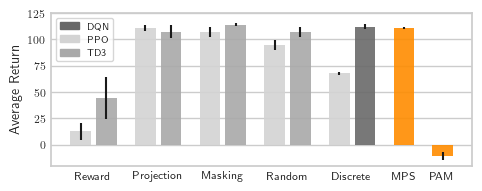

In [10]:
group = ['Reward', 'Reward', 'Projection', 'Projection', 'Masking', 'Masking', 'Random', 'Random', 'Discrete', 'Discrete', 'MPS', 'PAM']
results = [i + 1 for i in range(len(group))]
alg = ['PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'DQN', 'a', 'b']
results = [12.69862, 43.941, 110.60614, 107.3630, 106.79622, 113.88257, 94.5582, 106.85385, 
           67.55602, 112.1352, 110.73, -10.8747]
yerr = [7.96413, 19.87329, 3.061644, 6.57215, 4.92246, 1.2786, 4.39334, 4.646180, 1.44521, 2.398638, 1.42, 3.93537]

alg_cat = pd.Categorical(alg)
alg_colors = [colors[c] for c in alg_cat.codes]

sns.set_style("whitegrid")
fig = plt.figure(figsize=(4.981320049813201, 2.0786250996258775))

dist_groups = 0.5 # distance between successive groups
pos = (np.array([0] + [g1 != g2 for g1, g2 in zip(group[:-1], group[1:])]) * dist_groups + 1).cumsum()
labels = [g1 for g1, g2 in zip(group[:-1], group[1:]) if g1 != g2] + group[-1:]
label_pos = [sum([p for g, p in zip(group, pos) if g == label]) / len([1 for g in group if g == label])
             for label in labels]
plt.ylim([-20.0, 120.0])
plt.ylabel('Average Return', fontsize= 10) 
ax = plt.bar(pos, results, color=alg_colors,
       linewidth=0, yerr=yerr, alpha=0.9)
plt.xticks(label_pos, labels, fontsize=8)
plt.yticks(np.arange(0,150,25), fontsize=8)
handles = [Patch(color=colors[c], label=lab) for c, lab in enumerate(pd.Categorical(alg[:-2]).categories)]
plt.legend(handles=handles, loc='upper left', fontsize=7, title=None, facecolor="white")
plt.gca().tick_params(which='major', pad=-2)

fig.tight_layout()
plt.grid(False)
plt.gca().yaxis.grid(True)
plt.savefig('eval_rewards.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [6]:
temp = episode_results.groupby(['algorithm', 'num'])['reward'].mean()
temp = temp.reset_index()
temp.groupby('algorithm').agg(['mean', 'std']).round(2).astype('str')

num        reward       
               mean   std    mean    std
algorithm                               
DQN-Masked      2.5  1.87  108.31   6.47
MPS-TD3         2.5  1.87    5.35  11.63
PAM             2.5  1.87   10.04  24.82
PPO             2.5  1.87    1.27   2.13
PPO-Masked      2.5  1.87   33.38   4.61
PPO-Masking     2.5  1.87   52.71  13.95
PPO-Projection  2.5  1.87    55.1  27.31
PPO-Random      2.5  1.87   49.73   20.9
TD3             2.5  1.87  -10.83   4.46
TD3-Masking     2.5  1.87   21.01  32.59
TD3-Projection  2.5  1.87    4.36   17.7
TD3-Random      2.5  1.87   18.34  28.31

#### Fraction Solved

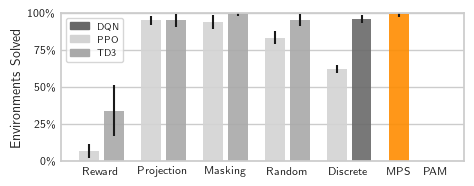

In [11]:
group = ['Reward', 'Reward', 'Projection', 'Projection', 'Masking', 'Masking', 'Random', 'Random', 'Discrete', 'Discrete', 'MPS', 'PAM']
results = [i + 1 for i in range(len(group))]
alg = ['PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'DQN', 'a', 'b']
results = [0.06666, 0.33750, 0.95000, 0.9500, 0.93750, 0.99166, 0.8333, 0.9541, 
           0.62083, 0.96250, 0.9917, 0.00]
yerr = [0.049160, 0.17230, 0.027386, 0.04472, 0.046771, 0.01291, 0.04378, 0.04306, 0.029226, 0.026220, 0.0204, 0.0000]

alg_cat = pd.Categorical(alg)
alg_colors = [colors[c] for c in alg_cat.codes]

fig = plt.figure(figsize=(4.981320049813201, 2.0786250996258775))

dist_groups = 0.5 # distance between successive groups
pos = (np.array([0] + [g1 != g2 for g1, g2 in zip(group[:-1], group[1:])]) * dist_groups + 1).cumsum()
labels = [g1 for g1, g2 in zip(group[:-1], group[1:]) if g1 != g2] + group[-1:]
label_pos = [sum([p for g, p in zip(group, pos) if g == label]) / len([1 for g in group if g == label])
             for label in labels]
plt.ylim([0.0, 1.0])
plt.ylabel('Environments Solved', fontsize= 10) 
ax = plt.bar(pos, results, color=alg_colors,
       linewidth=0, yerr=yerr, alpha=0.9)

handles = [Patch(color=colors[c], label=lab) for c, lab in enumerate(pd.Categorical(alg[:-2]).categories)]
plt.legend(handles=handles, loc='upper left', fontsize=7, title=None, facecolor="white")
plt.gca().tick_params(which='major', pad=-2)
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
fig.tight_layout()
plt.yticks(np.arange(0,1.25,0.25), fontsize=8)
plt.xticks(label_pos, labels, fontsize=8)
plt.grid(False)
plt.gca().yaxis.grid(True)
plt.savefig('eval_solved.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [7]:
temp = episode_results.groupby(['algorithm', 'num'])['solved'].agg(sum='sum', count='count')
temp['frac'] = temp['sum'] / temp['count']
temp = temp.reset_index()
temp.groupby('algorithm').agg(['mean', 'std']).round(4) * 100

num              sum            count        frac       
                 mean     std     mean      std    mean  std   mean    std
algorithm                                                                 
DQN-Masked      250.0  187.08  3900.00   154.92  4000.0  0.0  97.50   3.87
MPS-TD3         250.0  187.08   233.33   196.64  4000.0  0.0   5.83   4.92
PAM             250.0  187.08   483.33   604.70  4000.0  0.0  12.08  15.12
PPO             250.0  187.08    16.67    40.82  4000.0  0.0   0.42   1.02
PPO-Masked      250.0  187.08  1266.67   186.19  4000.0  0.0  31.67   4.65
PPO-Masking     250.0  187.08  1800.00   485.80  4000.0  0.0  45.00  12.14
PPO-Projection  250.0  187.08  1950.00  1011.43  4000.0  0.0  48.75  25.29
PPO-Random      250.0  187.08  1800.00   784.86  4000.0  0.0  45.00  19.62
TD3             250.0  187.08    16.67    40.82  4000.0  0.0   0.42   1.02
TD3-Masking     250.0  187.08   816.67   936.84  4000.0  0.0  20.42  23.42
TD3-Projection  250.0  187.08   333.33   527.89  4000.0  0.0   8.33  13.20
TD3-Random      250.0  187.08   733.33   884.68  4000.0  0.0  18.33  22.12

#### Episode Length

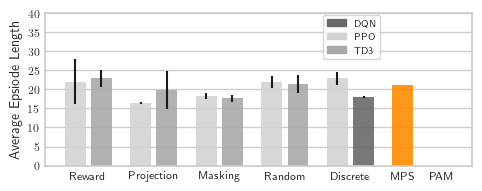

In [12]:
group = ['Reward', 'Reward', 'Projection', 'Projection', 'Masking', 'Masking', 'Random', 'Random', 'Discrete', 'Discrete', 'MPS', 'PAM']
results = [i + 1 for i in range(len(group))]
alg = ['PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'TD3', 'PPO', 'DQN', 'a', 'b']
results = [22.020, 22.88551, 16.45349, 19.79871, 18.15053, 17.59391, 21.8300, 21.3602, 
           22.8632, 17.8802, 21.11, 0.0]
yerr = [5.796184, 2.17275, 0.22891, 4.90024, 0.752742, 0.814822, 1.613204, 2.342868, 1.7620, 0.27795, 0.07, 0.00]

alg_cat = pd.Categorical(alg)
alg_colors = [colors[c] for c in alg_cat.codes]

fig = plt.figure(figsize=(4.981320049813201, 2.0786250996258775))

dist_groups = 0.5 # distance between successive groups
pos = (np.array([0] + [g1 != g2 for g1, g2 in zip(group[:-1], group[1:])]) * dist_groups + 1).cumsum()
labels = [g1 for g1, g2 in zip(group[:-1], group[1:]) if g1 != g2] + group[-1:]
label_pos = [sum([p for g, p in zip(group, pos) if g == label]) / len([1 for g in group if g == label])
             for label in labels]
plt.ylim([0.0, 40.0])
plt.ylabel('Average Epsiode Length', fontsize= 10) 
ax = plt.bar(pos, results, color=alg_colors,
       linewidth=0, yerr=yerr, alpha=0.9)
plt.xticks(label_pos, labels, fontsize=8)
plt.yticks(np.arange(0,45,5), fontsize=8)
handles = [Patch(color=colors[c], label=lab) for c, lab in enumerate(pd.Categorical(alg[:-2]).categories)]
plt.legend(handles=handles, loc=(0.65,0.7), fontsize=7, title=None, facecolor="white")
plt.gca().tick_params(which='major', pad=-2)

fig.tight_layout()
plt.grid(False)
plt.gca().yaxis.grid(True)
plt.savefig('eval_steps.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [8]:
temp = episode_results[episode_results['solved']].groupby(['algorithm', 'num'])['steps'].mean()
temp = temp.reset_index()
temp.groupby('algorithm').agg(['mean', 'std']).round(2)

num        steps      
               mean   std   mean   std
algorithm                             
DQN-Masked      2.5  1.87  21.51  4.47
MPS-TD3         2.6  2.07  35.16  3.13
PAM             2.5  2.38  28.27  1.56
PPO             1.0   NaN  20.00   NaN
PPO-Masked      2.5  1.87  24.22  1.66
PPO-Masking     2.5  1.87  25.81  1.17
PPO-Projection  2.5  1.87  28.60  3.72
PPO-Random      2.5  1.87  29.65  1.70
TD3             1.0   NaN  37.00   NaN
TD3-Masking     2.0  2.16  32.01  3.50
TD3-Projection  2.8  1.92  31.89  6.21
TD3-Random      2.5  2.08  32.39  2.16

#### Control Variables

In [9]:
temp = step_results.groupby(['algorithm', 'num'])[['number_intervals', 'fraction_allowed_actions', 'allowed_interval_length', 'interval_avg', 'interval_min', 'interval_max', 'interval_variance']].mean()
temp = temp.reset_index()
temp.groupby('algorithm').agg(['mean', 'std']).round(2)

num       number_intervals       fraction_allowed_actions  \
               mean   std             mean   std                     mean   
algorithm                                                                   
DQN-Masked      2.5  1.87             1.33  0.04                     0.65   
MPS-TD3         2.5  1.87             1.51  0.02                     0.65   
PAM             2.5  1.87             1.37  0.04                     0.69   
PPO             2.5  1.87             1.32  0.03                     0.75   
PPO-Masked      2.5  1.87             1.34  0.04                     0.66   
PPO-Masking     2.5  1.87             1.37  0.02                     0.66   
PPO-Projection  2.5  1.87             1.35  0.01                     0.65   
PPO-Random      2.5  1.87             1.38  0.02                     0.66   
TD3             2.5  1.87             1.38  0.04                     0.75   
TD3-Masking     2.5  1.87             1.42  0.09                     0.66   
TD3-Projection  2.5  1.87             1.35  0.08                     0.65   
TD3-Random      2.5  1.87             1.44  0.04                     0.67   

                     allowed_interval_length       interval_avg        \
                 std                    mean   std         mean   std   
algorithm                                                               
DQN-Masked      0.02                  144.09  4.85       126.31  5.18   
MPS-TD3         0.02                  142.27  4.43       114.46  3.91   
PAM             0.02                  151.20  4.19       130.00  5.09   
PPO             0.01                  164.34  3.07       144.62  3.70   
PPO-Masked      0.01                  145.01  2.09       126.44  1.07   
PPO-Masking     0.02                  144.57  3.84       124.36  4.04   
PPO-Projection  0.01                  143.51  3.05       124.21  2.54   
PPO-Random      0.01                  145.62  1.99       124.89  2.20   
TD3             0.02                  165.08  3.56       141.25  5.96   
TD3-Masking     0.02                  145.85  4.04       122.13  4.37   
TD3-Projection  0.04                  143.61  8.58       123.23  3.85   
TD3-Random      0.03                  148.03  7.65       122.99  6.92   

               interval_min       interval_max       interval_variance          
                       mean   std         mean   std              mean     std  
algorithm                                                                       
DQN-Masked           117.93  5.53       134.72  4.94            332.59   39.78  
MPS-TD3              101.47  3.67       127.53  4.18            534.03   32.51  
PAM                  120.30  5.52       139.75  4.83            405.11   55.11  
PPO                  134.57  4.18       154.69  3.30            453.64   41.82  
PPO-Masked           117.91  1.39       134.99  1.21            341.81   26.87  
PPO-Masking          114.47  4.01       134.32  4.11            405.97   30.57  
PPO-Projection       115.20  2.46       133.28  2.75            369.43   33.25  
PPO-Random           115.04  2.42       134.80  2.15            411.82   38.29  
TD3                  129.71  7.40       152.84  4.84            525.27  118.62  
TD3-Masking          111.07  5.96       133.27  3.33            473.27   75.23  
TD3-Projection       113.66  2.28       132.85  6.00            411.42  110.39  
TD3-Random           111.09  6.80       135.00  7.17            510.08   50.72

##### Export tables to Latex

In [10]:
temp = step_results.groupby(['algorithm', 'num'])[['number_intervals', 'fraction_allowed_actions', 'allowed_interval_length', 'interval_avg', 'interval_min', 'interval_max', 'interval_variance']].mean()
temp = temp.reset_index()
temp.groupby('algorithm').agg(['mean', 'std'])
printdf = temp.groupby('algorithm').agg(['mean', 'std'])
printdf = printdf.loc[:,(['interval_avg', 'interval_min', 'interval_max', 'interval_variance'], 'mean')].round(2).astype(str).replace(r'\.0$', '', regex=True)
printdf = '$'+printdf+ '$'
printdf.style.to_latex()

'\\begin{tabular}{lllll}\n & interval_avg & interval_min & interval_max & interval_variance \\\\\n & mean & mean & mean & mean \\\\\nalgorithm &  &  &  &  \\\\\nDQN-Masked & $126.31$ & $117.93$ & $134.72$ & $332.59$ \\\\\nMPS-TD3 & $114.46$ & $101.47$ & $127.53$ & $534.03$ \\\\\nPAM & $130$ & $120.3$ & $139.75$ & $405.11$ \\\\\nPPO & $144.62$ & $134.57$ & $154.69$ & $453.64$ \\\\\nPPO-Masked & $126.44$ & $117.91$ & $134.99$ & $341.81$ \\\\\nPPO-Masking & $124.36$ & $114.47$ & $134.32$ & $405.97$ \\\\\nPPO-Projection & $124.21$ & $115.2$ & $133.28$ & $369.43$ \\\\\nPPO-Random & $124.89$ & $115.04$ & $134.8$ & $411.82$ \\\\\nTD3 & $141.25$ & $129.71$ & $152.84$ & $525.27$ \\\\\nTD3-Masking & $122.13$ & $111.07$ & $133.27$ & $473.27$ \\\\\nTD3-Projection & $123.23$ & $113.66$ & $132.85$ & $411.42$ \\\\\nTD3-Random & $122.99$ & $111.09$ & $135$ & $510.08$ \\\\\n\\end{tabular}\n'

In [11]:
printdf = temp.groupby('algorithm').agg(['mean', 'std'])
printdf = printdf.loc[:,(['interval_avg', 'interval_min', 'interval_max', 'interval_variance'], 'std')].round(2).astype(str).replace(r'\.0$', '', regex=True)
printdf = ' \pm '+ printdf
printdf.style.to_latex()

'\\begin{tabular}{lllll}\n & interval_avg & interval_min & interval_max & interval_variance \\\\\n & std & std & std & std \\\\\nalgorithm &  &  &  &  \\\\\nDQN-Masked &  \\pm 5.18 &  \\pm 5.53 &  \\pm 4.94 &  \\pm 39.78 \\\\\nMPS-TD3 &  \\pm 3.91 &  \\pm 3.67 &  \\pm 4.18 &  \\pm 32.51 \\\\\nPAM &  \\pm 5.09 &  \\pm 5.52 &  \\pm 4.83 &  \\pm 55.11 \\\\\nPPO &  \\pm 3.7 &  \\pm 4.18 &  \\pm 3.3 &  \\pm 41.82 \\\\\nPPO-Masked &  \\pm 1.07 &  \\pm 1.39 &  \\pm 1.21 &  \\pm 26.87 \\\\\nPPO-Masking &  \\pm 4.04 &  \\pm 4.01 &  \\pm 4.11 &  \\pm 30.57 \\\\\nPPO-Projection &  \\pm 2.54 &  \\pm 2.46 &  \\pm 2.75 &  \\pm 33.25 \\\\\nPPO-Random &  \\pm 2.2 &  \\pm 2.42 &  \\pm 2.15 &  \\pm 38.29 \\\\\nTD3 &  \\pm 5.96 &  \\pm 7.4 &  \\pm 4.84 &  \\pm 118.62 \\\\\nTD3-Masking &  \\pm 4.37 &  \\pm 5.96 &  \\pm 3.33 &  \\pm 75.23 \\\\\nTD3-Projection &  \\pm 3.85 &  \\pm 2.28 &  \\pm 6 &  \\pm 110.39 \\\\\nTD3-Random &  \\pm 6.92 &  \\pm 6.8 &  \\pm 7.17 &  \\pm 50.72 \\\\\n\\end{tabular}\n'

### Plots

##### Allowed Action Space

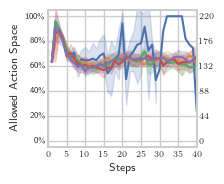

In [12]:
test = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['fraction_allowed_actions'].agg(['mean', 'std']).reset_index()
test['mean'] = test['mean'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

fig = plt.figure(figsize=(2.4, 2.0))

ax = sns.lineplot(data=test, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, 
                  hue_order=algorithms)
ax.set_ylim([-0.05, 1.05])
ax.set_xlim([0.0, 40.0])
#ax.legend(fontsize=6, title=None, facecolor="white")
plt.ylabel('Allowed Action Space', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(np.arange(0.0,1.2, 0.2), fontsize=6)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))

if True:
    ax2 = ax.twinx()
    ax2.set_ylim([-11, 231])
    plt.ylabel(None)
    ax2.tick_params(which='major', pad=-2)
    plt.yticks(np.arange(0.0,264, 44), fontsize=6)
    ax2.grid(False)
    ax.tick_params(axis="y", left=False, pad=-4.5)
    ax2.tick_params(axis="y", right=False, pad=-4.5)

fig.tight_layout()
plt.savefig('allowed.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

##### Number of disjoint intervals

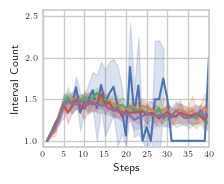

In [13]:
test2 = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['number_intervals'].agg(['mean', 'std']).reset_index()
test2

fig = plt.figure(figsize=(2.4, 2.0))

ax = sns.lineplot(data=test2, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, 
                  hue_order=algorithms)
ax.set_ylim([0.925, 2.575])
ax.set_xlim([0.0, 40.0])
plt.ylabel('Interval Count', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(fontsize=6)



fig.tight_layout()
plt.savefig('count.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

##### Average length of the single intervals

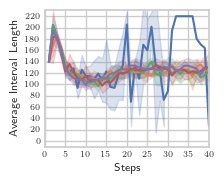

In [14]:
test2 = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['interval_avg'].agg(['mean', 'std']).reset_index()

fig = plt.figure(figsize=(2.4, 2.0))

ax = sns.lineplot(data=test2, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, hue_order=algorithms)
ax.set_ylim([-11, 231])
ax.set_xlim([0.0, 40.0])
plt.ylabel('Average Interval Length', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(np.arange(0.0, 240, 20), fontsize=6)

fig.tight_layout()
plt.savefig('average.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

##### Average length of the smallest interval in the action space

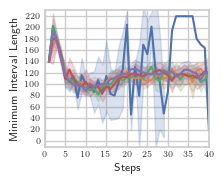

In [15]:
test2 = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['interval_min'].agg(['mean', 'std']).reset_index()

fig = plt.figure(figsize=(2.4, 2.0))

ax = sns.lineplot(data=test2, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, hue_order=algorithms)
ax.set_ylim([-11, 231])
ax.set_xlim([0.0, 40.0])
plt.ylabel('Minimum Interval Length', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(np.arange(0.0, 240, 20), fontsize=6)

fig.tight_layout()
plt.savefig('minimum.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

##### Average length of the largest interval in the action space

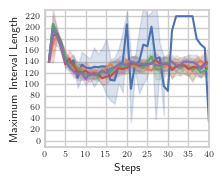

In [16]:
test2 = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['interval_max'].agg(['mean', 'std']).reset_index()

fig = plt.figure(figsize=(2.4, 2.0))

ax = sns.lineplot(data=test2, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, hue_order=algorithms)
ax.set_ylim([-11, 231])
ax.set_xlim([0.0, 40.0])
plt.ylabel('Maximum Interval Length', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(np.arange(0.0, 240, 20), fontsize=6)

fig.tight_layout()
plt.savefig('maximum.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

##### Variance in the interval lengths

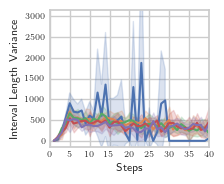

In [17]:
test2 = step_results[step_results['algorithm'].isin(algorithms)].groupby(['algorithm', 'num', 'step'])['interval_variance'].agg(['mean', 'std']).reset_index()

fig = plt.figure(figsize=(2.4, 2.0))
# palette=['#8E8D8D', '#E26028']
ax = sns.lineplot(data=test2, x='step', y='mean', errorbar='sd', hue='algorithm', legend=False, 
                  hue_order=algorithms)
#ax.set_ylim([-50, 1050])
ax.set_ylim([-150, 3150])
ax.set_xlim([0.0, 40.0])
plt.ylabel('Interval Length Variance', fontsize= 8) 
plt.xlabel('Steps', fontsize= 8)
ax.tick_params(which='major', pad=-3)
plt.xticks(np.arange(0.0, 45, 5), fontsize=6)
plt.yticks(np.arange(0, 3500, 500), fontsize=6)

fig.tight_layout()
plt.savefig('variance.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

### Trajectories

Maximum Reward


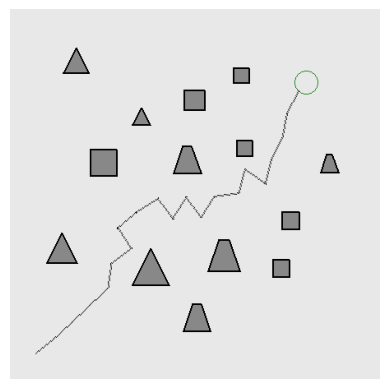

Minimum Reward


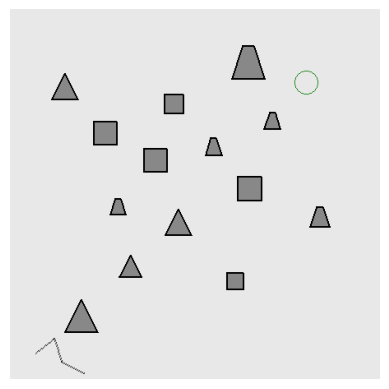

Random Sample


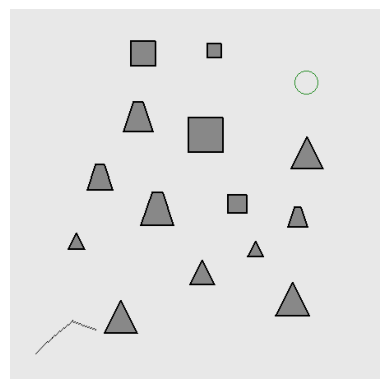

In [18]:
algorithm = 'PPO'

algorithm_results = episode_results[episode_results['algorithm'] == algorithm]
algorithm_results = algorithm_results.reset_index(drop=True)

print('Maximum Reward')
maximum = algorithm_results.loc[algorithm_results['reward'].idxmax()]
env_config = {
    'STEPS_PER_EPISODE': 5,
    'ACTION_RANGE': 220,
    'DT': 1.0,
    'SAFETY_DISTANCE': 0.05,
    'REWARD': {
        'TIMESTEP_PENALTY_COEFFICIENT': 0.05,
        'REWARD_COEFFICIENT': 5.0,
        'GOAL': 50,
        'COLLISION': -20.0
    },
    'LEVELS': {
        1: {
            'HEIGHT': 15.0,
            'WIDTH': 15.0,
            'AGENT': {'x': 1.0, 'y': 1.0, 'angle': 90.0, 'step_size': 1.0, 'radius': 0.4},
            'GOAL': {'x': 12.0, 'y': 12.0, 'radius': 0.5},
            'OBSTACLES': {
                **generate_obstacles(15.0,
                                     15.0,
                                     14,
                                     [[4.0, 0.0], [0.0, 4.0]],
                                     mean_size_obstacle=1.0,
                                     sigma_size_obstacle=0.25,
                                     range_size_obstacle=0.5,
                                     seed=maximum['seed'],
                                     forbidden_circles=[[1.0, 1.0, 0.4], [12.0, 12.0, 0.5]])
            }
        }
    }
}
env = ObstacleAvoidance(env_config, render_mode='jupyter')
obs = env.reset()
env.agent.x = 50
env.agent.y = 50
env.trajectory = eval(maximum['trajectory'])
env.render(draw_trajectory = True, draw_information = False)


print('Minimum Reward')
minimum = algorithm_results.loc[algorithm_results['reward'].idxmin()]
env_config['LEVELS'][1]['OBSTACLES'] = {
                **generate_obstacles(15.0,
                                     15.0,
                                     14,
                                     [[4.0, 0.0], [0.0, 4.0]],
                                     mean_size_obstacle=1.0,
                                     sigma_size_obstacle=0.25,
                                     range_size_obstacle=0.5,
                                     seed=minimum['seed'],
                                     forbidden_circles=[[1.0, 1.0, 0.4], [12.0, 12.0, 0.5]])
            }
env = ObstacleAvoidance(env_config, render_mode='jupyter')
obs = env.reset()
env.agent.x = 50
env.agent.y = 50
env.trajectory = eval(minimum['trajectory'])
env.render(draw_trajectory = True, draw_information = False)


print('Random Sample')
sample = algorithm_results.sample(n=1, random_state=42)
env_config['LEVELS'][1]['OBSTACLES'] = {
                **generate_obstacles(15.0,
                                     15.0,
                                     14,
                                     [[4.0, 0.0], [0.0, 4.0]],
                                     mean_size_obstacle=1.0,
                                     sigma_size_obstacle=0.25,
                                     range_size_obstacle=0.5,
                                     seed=sample['seed'], 
                                     forbidden_circles=[[1.0, 1.0, 0.4], [12.0, 12.0, 0.5]])
            }
env = ObstacleAvoidance(env_config, render_mode='jupyter')
obs = env.reset()
env.agent.x = 50
env.agent.y = 50
env.trajectory = eval(sample['trajectory'].iloc[0])
env.render(draw_trajectory = True, draw_information = False)

### Welch's t-test (p-values)

In [23]:
sns.set()

##### Choose metric to plot p-values for

In [ ]:
temp = episode_results[episode_results['solved']].groupby(['algorithm', 'num'])['steps'].mean()
temp = temp.reset_index()
temp

In [ ]:
temp = episode_results.groupby(['algorithm', 'num'])['solved'].agg(sum='sum', count='count')
temp = temp['sum'] / temp['count']
temp = temp.reset_index()
temp.columns = ['algorithm', 'num', 'solved']
temp

In [58]:
temp = episode_results.groupby(['algorithm', 'num'])['reward'].mean()
temp = temp.reset_index()
temp

,algorithm,num,reward
0,DQN-Masked,0,111.408898
1,DQN-Masked,1,115.724946
2,DQN-Masked,2,113.773092
3,DQN-Masked,3,108.847471
4,DQN-Masked,4,112.278747
5,DQN-Masked,5,110.778343
6,MPS-TD3,0,111.607294
7,MPS-TD3,1,111.326233
8,MPS-TD3,2,107.866357
9,MPS-TD3,3,111.212853


##### Execute one after the other

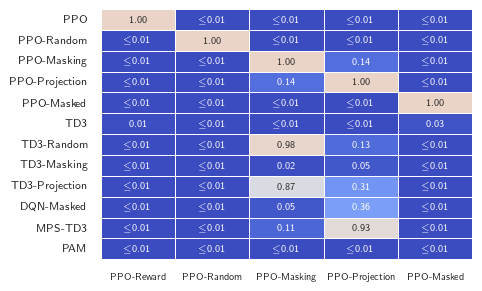

In [63]:
algorithms = ['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked']

mask = np.triu(np.ones((5,5)))[1:]

p_results = []
for algorithm in all:
    algorithm_p_results = []
    for algorithm_2 in algorithms:
        p = stats.ttest_ind(temp[temp['algorithm'] == algorithm]['reward'], 
                        temp[temp['algorithm'] == algorithm_2]['reward'], equal_var = False).pvalue
        algorithm_p_results.append(p)
    p_results.append(algorithm_p_results)
    
fig = plt.figure(figsize=set_size(360.0))

ax = sns.heatmap(np.array(p_results), vmin = 0.0, vmax = 1.0, annot = annotations, 
                 annot_kws={'fontsize':7}, linewidth=0.5, cbar=False,
                 linecolor='white',center= 0.9, cmap= 'coolwarm', fmt='')
ax.set_yticklabels(all, rotation = 0, fontsize=8)
ax.set_xticklabels(['PPO-Reward', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked'], fontsize=7)

fig.tight_layout()
plt.savefig('on_policy_t_reward.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [64]:
annotations = p_results.copy()
for idx, x in enumerate(p_results):
    for idy, y in enumerate(x):
        annotations[idx][idy] = "%.2f" % annotations[idx][idy]
        if y < 0.01:
            annotations[idx][idy] = r'$\leq$0.01'
            
annotations = np.array(annotations)

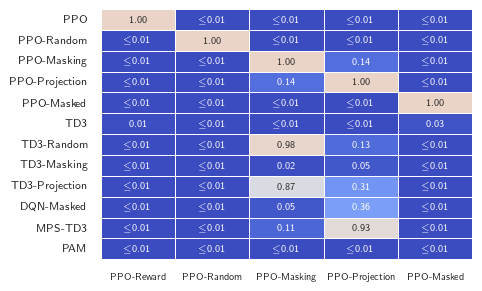

In [65]:
algorithms = ['PPO', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked']

mask = np.triu(np.ones((5,5)))[1:]

p_results = []
for algorithm in all:
    algorithm_p_results = []
    for algorithm_2 in algorithms:
        p = stats.ttest_ind(temp[temp['algorithm'] == algorithm]['reward'], 
                        temp[temp['algorithm'] == algorithm_2]['reward'], equal_var = False).pvalue
        algorithm_p_results.append(p)
    p_results.append(algorithm_p_results)
    
fig = plt.figure(figsize=set_size(360.0))

ax = sns.heatmap(np.array(p_results), vmin = 0.0, vmax = 1.0, annot = annotations, 
                 annot_kws={'fontsize':7}, linewidth=0.5, cbar=False,
                 linecolor='white',center= 0.9, cmap= 'coolwarm', fmt='')
ax.set_yticklabels(all, rotation = 0, fontsize=8)
ax.set_xticklabels(['PPO-Reward', 'PPO-Random', 'PPO-Masking', 'PPO-Projection', 'PPO-Masked'], fontsize=7)

fig.tight_layout()
plt.savefig('on_policy_t_reward.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

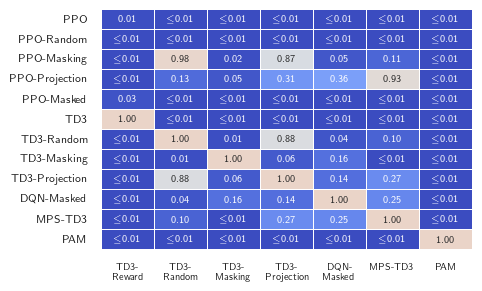

In [71]:
algorithms = ['TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked']

p_results = []
for algorithm in all:
    algorithm_p_results = []
    for algorithm_2 in algorithms + ['MPS-TD3', 'PAM']:
        p = stats.ttest_ind(temp[temp['algorithm'] == algorithm]['reward'], 
                        temp[temp['algorithm'] == algorithm_2]['reward'], equal_var = False).pvalue
        algorithm_p_results.append(p)
    p_results.append(algorithm_p_results)
    
fig = plt.figure(figsize=set_size(360.0))

ax = sns.heatmap(np.array(p_results), vmin = 0.0, vmax = 1.0, annot = annotations, 
                 annot_kws={'fontsize':7}, linewidth=0.5, cbar=False,
                 linecolor='white',center= 0.9, cmap= 'coolwarm', fmt='')
ax.set_yticklabels(all, rotation = 0, fontsize=8)
ax.set_xticklabels(['TD3-\nReward', 'TD3-\nRandom', 'TD3-\nMasking', 'TD3-\nProjection', 'DQN-\nMasked', 'MPS-TD3', 'PAM'], fontsize=7)

fig.tight_layout()
plt.savefig('off_policy_t_reward.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)

In [68]:
annotations = p_results.copy()
for idx, x in enumerate(p_results):
    for idy, y in enumerate(x):
        annotations[idx][idy] = "%.2f" % annotations[idx][idy]
        if y < 0.01:
            annotations[idx][idy] = r'$\leq$0.01'
            
annotations = np.array(annotations)

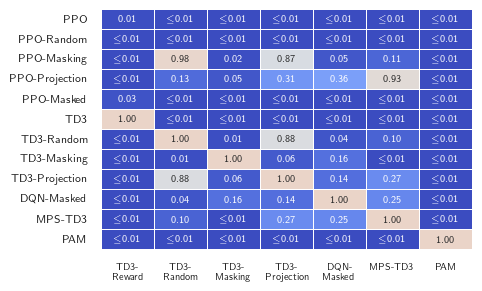

In [70]:
algorithms = ['TD3', 'TD3-Random', 'TD3-Masking', 'TD3-Projection', 'DQN-Masked']

p_results = []
for algorithm in all:
    algorithm_p_results = []
    for algorithm_2 in algorithms + ['MPS-TD3', 'PAM']:
        p = stats.ttest_ind(temp[temp['algorithm'] == algorithm]['reward'], 
                        temp[temp['algorithm'] == algorithm_2]['reward'], equal_var = False).pvalue
        algorithm_p_results.append(p)
    p_results.append(algorithm_p_results)
    
fig = plt.figure(figsize=set_size(360.0))

ax = sns.heatmap(np.array(p_results), vmin = 0.0, vmax = 1.0, annot = annotations, 
                 annot_kws={'fontsize':7}, linewidth=0.5, cbar=False,
                 linecolor='white',center= 0.9, cmap= 'coolwarm', fmt='')
ax.set_yticklabels(all, rotation = 0, fontsize=8)
ax.set_xticklabels(['TD3-\nReward', 'TD3-\nRandom', 'TD3-\nMasking', 'TD3-\nProjection', 'DQN-\nMasked', 'MPS-TD3', 'PAM'], fontsize=7)

fig.tight_layout()
plt.savefig('off_policy_t_solved.pgf', format='pgf', bbox_inches='tight', pad_inches = 0.0)